/var/folders/j9/9_xzwgd54_q0zh0c3c13nht8555bqz/T/ipykernel_10373/2362360061.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = label_encoder.fit_transform(X['Sex'])
/var/folders/j9/9_xzwgd54_q0zh0c3c13nht8555bqz/T/ipykernel_10373/2362360061.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = label_encoder.fit_transform(X['Embarked'])


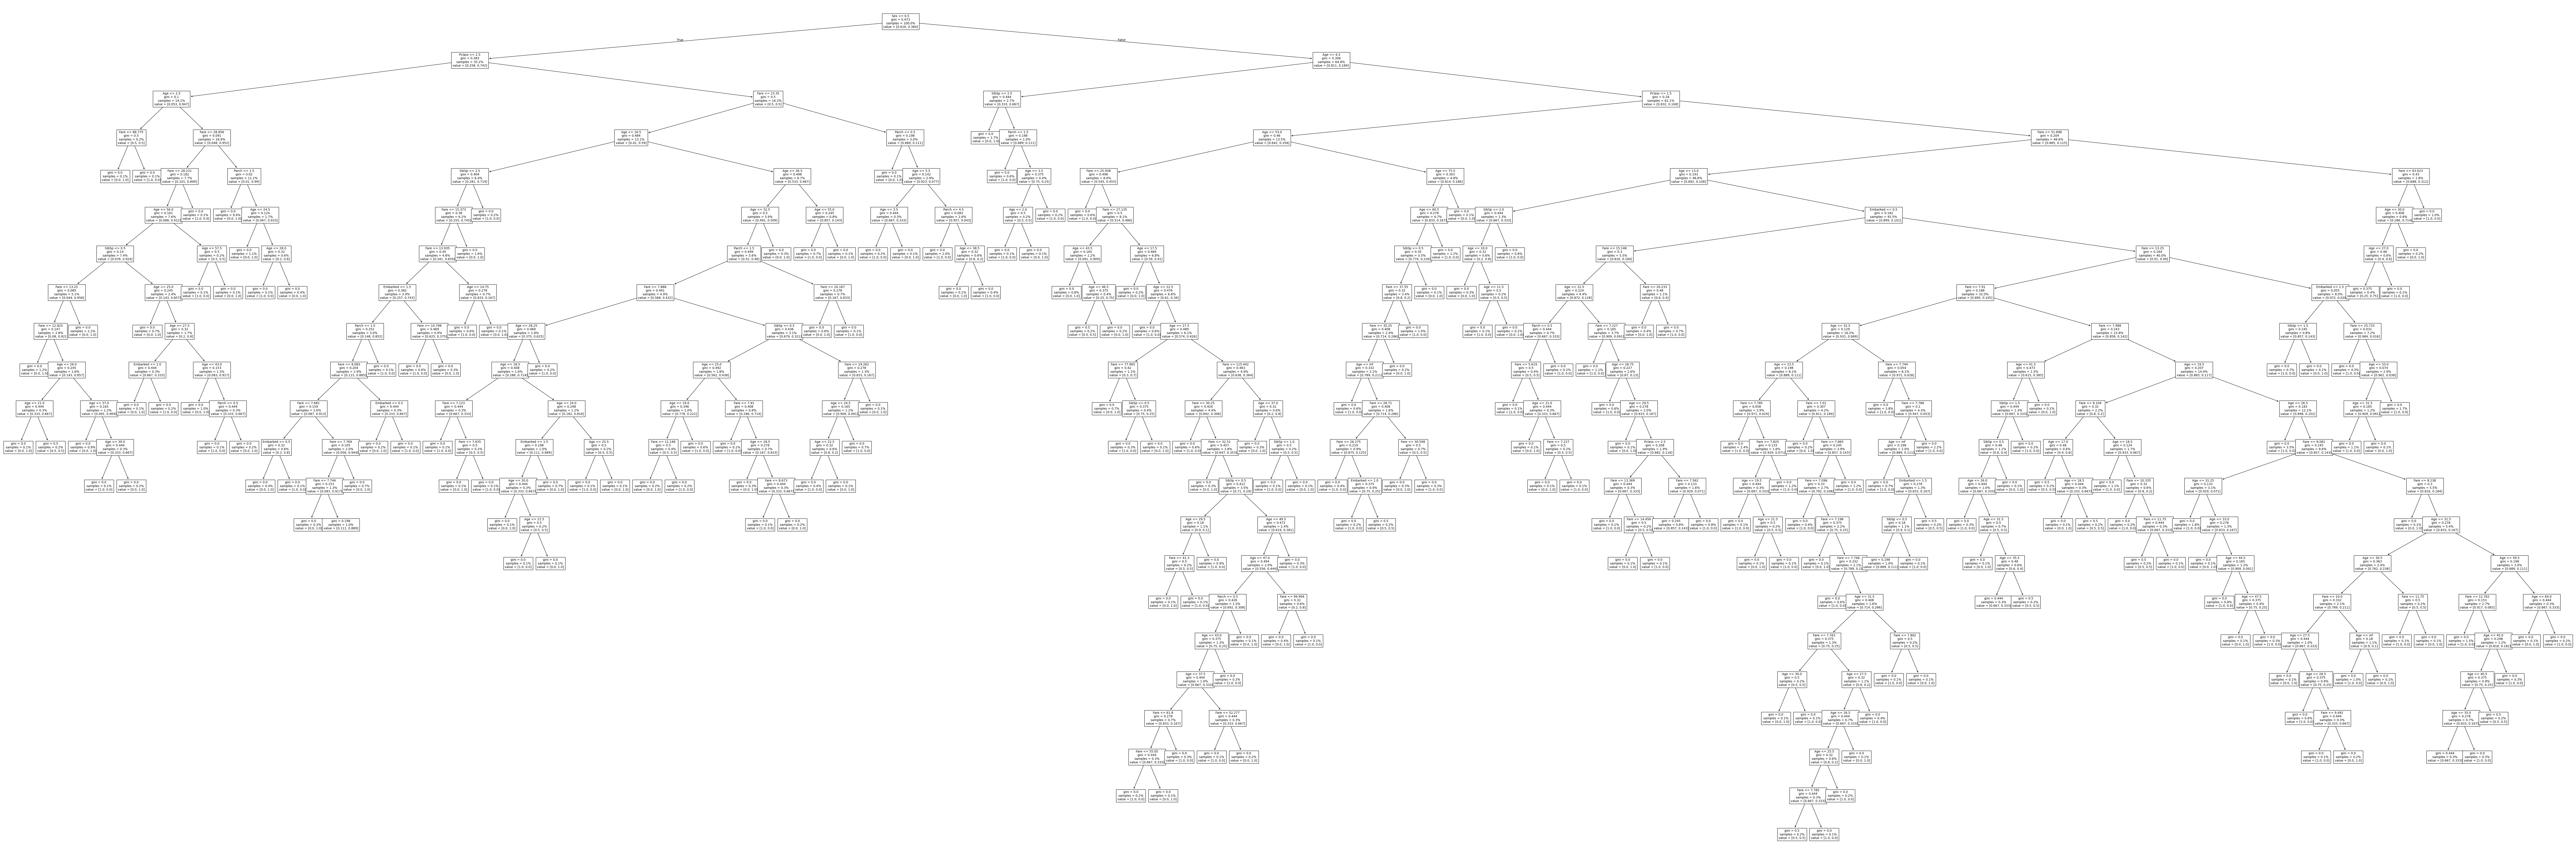

In [3]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

df = pd.read_csv("Titanic-Dataset.csv")
df.head()
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']



from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])
X['Embarked'] = label_encoder.fit_transform(X['Embarked'])
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
plt.figure(figsize=(150,50))
tree.plot_tree(dtree, feature_names=features, fontsize=10, proportion=True)
plt.show()

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

ladf = pd.read_csv("loan_approval_dataset.csv")
ladf.head()

features = [' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']
X = ladf[features]
y = ladf[' loan_status']
X_encoded = pd.get_dummies(X, columns=[' education', ' self_employed'], drop_first=True)

rf = RandomForestClassifier(random_state=42)
rf = rf.fit(X_encoded, y)
prediction = rf.predict(X_encoded)
print(accuracy_score(y, prediction))
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
# Initialize and train the Random Forest Classifier on the training data

rf.fit(X_train, y_train)

# Make predictions on the test data
predictions = rf.predict(X_test)

# Display the first few predictions
print("First 10 predictions on the test set:", predictions[:10])
# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, predictions)

# Display the accuracy score
print("Accuracy of the Random Forest Model on the test set:", accuracy)

1.0
Shape of X_train: (3201, 11)
Shape of X_test: (1068, 11)
Shape of y_train: (3201,)
Shape of y_test: (1068,)
First 10 predictions on the test set: [' Rejected' ' Approved' ' Rejected' ' Approved' ' Approved' ' Approved'
 ' Approved' ' Rejected' ' Approved' ' Rejected']
Accuracy of the Random Forest Model on the test set: 0.9794007490636704


In [5]:
# Example of new data for a single loan application
new_loan_data = {
    ' no_of_dependents': [2],
    ' education': [' Graduate'],
    ' self_employed': [' No'],
    ' income_annum': [7000000],
    ' loan_amount': [20000000],
    ' loan_term': [10],
    ' cibil_score': [750],
    ' residential_assets_value': [5000000],
    ' commercial_assets_value': [1000000],
    ' luxury_assets_value': [15000000],
    ' bank_asset_value': [6000000]
}

# Convert the new data into a pandas DataFrame
new_loan_df = pd.DataFrame(new_loan_data)

# Apply the same one-hot encoding as used on the training data
# Ensure the columns match the X_encoded used for training
new_loan_encoded = pd.get_dummies(new_loan_df, columns=[' education', ' self_employed'], drop_first=True)

# Make sure the columns in the new data match the columns in the training data (X_train)
# This is important if the new data doesn't have all categories present in the training data
# For example, if ' Not Graduate' or ' Yes' weren't in new_loan_encoded but were in X_train
missing_cols = set(X_train.columns) - set(new_loan_encoded.columns)
for c in missing_cols:
    new_loan_encoded[c] = 0
# Ensure the order of columns is the same
new_loan_encoded = new_loan_encoded[X_train.columns]


# Use the trained model to predict the loan status
predicted_status = rf.predict(new_loan_encoded)

# Print the prediction
print("Predicted loan status for the new application:", predicted_status[0])

Predicted loan status for the new application:  Approved
